In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import igraph as ig

# Graficos Labos Ethernet S2

In [2]:
dfEthernet = pd.read_csv("tablas/capturaEthernet_s2_table.csv", sep=";")

#dfEntropyEther[0] -> entropy  ;   dfEntropyEther[1] -> max entropy
dfEntropyEther = dfEthernet["probability"][len(dfEthernet["probability"])-2:].reset_index(drop=True)
dfTableEthernet = dfEthernet[:len(dfEthernet["probability"])-2]
#print dfEntropyEther
#print dfTableEthernet

dfEthernet

,symbol,probability,information
0,"<ARP, 10.2.4.24>",0.000999,9.967780
1,"<ARP, 10.2.201.61>",0.000077,13.668220
2,"<ARP, 10.2.0.186>",0.056383,4.148584
3,"<ARP, 10.2.7.17>",0.001229,9.668220
4,"<ARP, 10.2.7.6>",0.000845,10.208789
5,"<ARP, 10.2.7.22>",0.000768,10.346292
6,"<ARP, 10.2.200.18>",0.000768,10.346292
7,"<ARP, 10.2.1.19>",0.001075,9.860865
8,"<ARP, 10.2.7.250>",0.002765,8.498295
9,"<ARP, 10.2.202.64>",0.000230,12.083258


### Labos Ethernet S2: info y entropia

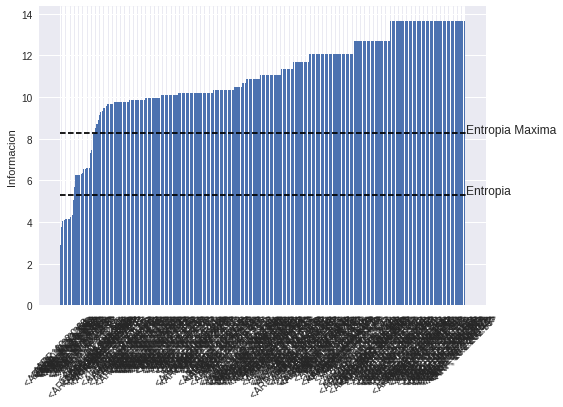

In [4]:
dfTableEthernetSortedInfo = dfTableEthernet.sort_values(by='information')

infoEther = dfTableEthernetSortedInfo["information"]
symbolsEther = dfTableEthernetSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoEther)), infoEther, align='center')
plt.xticks(range(len(symbolsEther)), symbolsEther,rotation=45)

plt.plot([0, len(symbolsEther)],[dfEntropyEther[0], dfEntropyEther[0]], 'k--', label='Entropia')
plt.text(len(symbolsEther), dfEntropyEther[0], 'Entropia')

plt.plot([0,len(symbolsEther)],[dfEntropyEther[1], dfEntropyEther[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsEther), dfEntropyEther[1], 'Entropia Maxima')

plt.show()

### Labos Ethernet S2: red subyacente

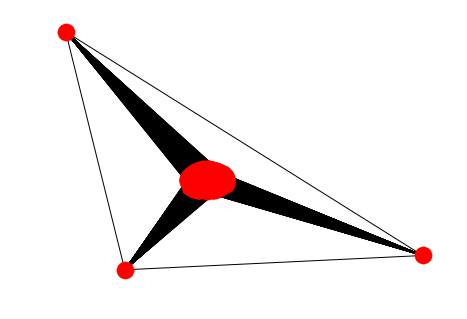

In [47]:
numbers = range(len(symbolsEther))
sym1 = []
sym2 = []

G=nx.Graph()
G.add_nodes_from(symbolsEther)

for i in range(len(symbolsEther)):
    for j in range(len(symbolsEther)):
        if i != j:
            G.add_edge(symbolsEther[i], symbolsEther[j])

nx.draw(G)
plt.show()

# Graficos Bufet Inalambrica S2

In [5]:
dfBufet = pd.read_csv("tablas/capturaBuffet_s2_table.csv", sep=";")

#dfEntropyBufet[0] -> entropy  ;   dfEntropyBufet[1] -> max entropy
dfEntropyBufet = dfBufet["probability"][len(dfBufet["probability"])-2:].reset_index(drop=True)
dfTableBufet = dfBufet[:len(dfBufet["probability"])-2]
#print dfEntropyBufet
#print dfTableBufet

dfBufet

,symbol,probability,information
0,"<ARP, 10.210.210.199>",0.569930,0.811143
1,"<ARP, 10.210.231.3>",0.300699,1.733607
2,"<ARP, 10.210.86.126>",0.013986,6.159871
3,"<ARP, 10.210.73.242>",0.020979,5.574909
4,"<ARP, 10.210.237.195>",0.020979,5.574909
5,"<ARP, 169.254.255.255>",0.052448,4.252981
6,"<ARP, 10.210.126.142>",0.020979,5.574909
7,entropy,1.643668,NaN
8,max_entropy,2.807355,NaN


### Bufet Inalambrica S2: info y entropia

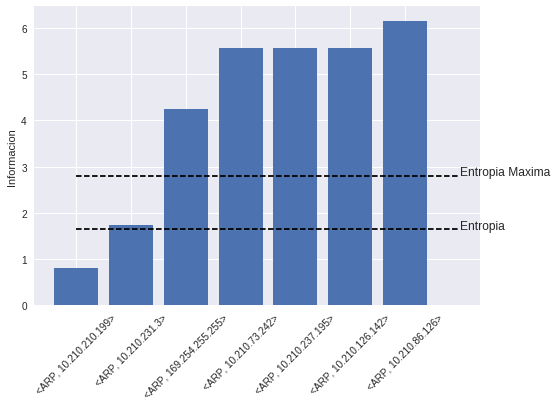

In [6]:
dfTableBufetSortedInfo = dfTableBufet.sort_values(by='information')

infoBufet = dfTableBufetSortedInfo["information"]
symbolsBufet = dfTableBufetSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoBufet)), infoBufet, align='center')
plt.xticks(range(len(symbolsBufet)), symbolsBufet,rotation=45)

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[0], dfEntropyBufet[0]], 'k--', label='Entropia')
plt.text(len(symbolsBufet), dfEntropyBufet[0], 'Entropia')

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[1], dfEntropyBufet[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsBufet), dfEntropyBufet[1], 'Entropia Maxima')

plt.show()

### Bufet Inalambrica S2: red subyacente

# Graficos Labos Inalambrica S2

In [7]:
dfLabos = pd.read_csv("tablas/capturaLaboDC_s2_table.csv", sep=";")

#dfEntropyLabos[0] -> entropy  ;   dfEntropyLabos[1] -> max entropy
dfEntropyLabos = dfLabos["probability"][len(dfLabos["probability"])-2:].reset_index(drop=True)
dfTableLabos = dfLabos[:len(dfLabos["probability"])-2]
#print dfEntropyLabos
#print dfTableLabos

dfLabos

,symbol,probability,information
0,"<ARP, 10.2.200.41>",0.000087,13.481736
1,"<ARP, 10.2.203.93>",0.000787,10.311811
2,"<ARP, 10.2.203.130>",0.000131,12.896774
3,"<ARP, 10.2.203.154>",0.000044,14.481736
4,"<ARP, 10.2.0.185>",0.009441,6.726849
5,"<ARP, 10.2.200.213>",0.000044,14.481736
6,"<ARP, 10.2.203.68>",0.000874,10.159808
7,"<ARP, 10.2.202.114>",0.000656,10.574846
8,"<ARP, 10.2.200.15>",0.000393,11.311811
9,"<ARP, 10.2.202.119>",0.000350,11.481736


### Labos Inalambrica S2: info y entropia

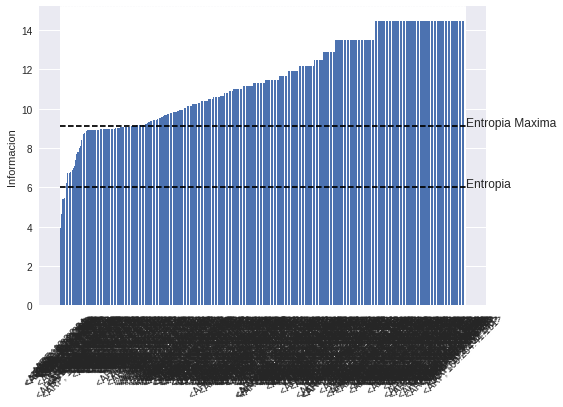

In [8]:
dfTableLabosSortedInfo = dfTableLabos.sort_values(by='information')

infoLabos = dfTableLabosSortedInfo["information"]
symbolsLabos = dfTableLabosSortedInfo["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoLabos)), infoLabos, align='center')
plt.xticks(range(len(symbolsLabos)), symbolsLabos,rotation=45)

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[0], dfEntropyLabos[0]], 'k--', label='Entropia')
plt.text(len(symbolsLabos), dfEntropyLabos[0], 'Entropia')

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[1], dfEntropyLabos[1]], 'k--', label='Entropia Maxima')
plt.text(len(symbolsLabos), dfEntropyLabos[1], 'Entropia Maxima')

plt.show()

### Labos Inalambrica S2: red subyacente